# Do the wavelength study for the hollow glass tube with polymer

Do it for both lossy and non-lossy polymer.  Both with air outside.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from scipy.optimize import newton

importing NGSolve-6.2.2203-56-g47f483033


# Initialize

In [31]:
n = 200
wls = np.linspace(1.5e-6, 1.585e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5

In [32]:
ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, 15*2.7183333333333333e-6, 15*2e-6]
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly, lambda x:n_air]
mats = ['air','glass', 'polymer','air']
maxhs = [10,10,10,10]

In [33]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/201: wavelength: 1.5e-06  --------------------     

Scaled beta:  (62.8430631308646-2.585634215449467e-06j) . Residual of determinant:  7.301104874604744e-11 


     --------------------  2/201: wavelength: 1.5004250000000001e-06  --------------------     

Scaled beta:  (62.82525178294929-2.5340398915404364e-06j) . Residual of determinant:  3.75958676731498e-10 


     --------------------  3/201: wavelength: 1.50085e-06  --------------------     

Scaled beta:  (62.80745064000699-2.5057626448589353e-06j) . Residual of determinant:  4.0851696216765616e-10 


     --------------------  4/201: wavelength: 1.501275e-06  --------------------     

Scaled beta:  (62.78965962808839-2.499729866681339e-06j) . Residual of determinant:  9.522135455733405e-10 


     --------------------  5/201: wavelength: 1.5017e-06  --------------------     

Scaled beta:  (62.77187867559247-2.515669125064867e-06j) . Residual of determinant:  2.616010363423179e-10 


     -------

Scaled beta:  (62.20855413068972-8.048643748765078e-06j) . Residual of determinant:  5.8177890324373685e-11 


     --------------------  38/201: wavelength: 1.515725e-06  --------------------     

Scaled beta:  (62.19108660228084-6.754681657962003e-06j) . Residual of determinant:  5.832885504300407e-11 


     --------------------  39/201: wavelength: 1.51615e-06  --------------------     

Scaled beta:  (62.173632147297376-5.795657398413693e-06j) . Residual of determinant:  2.617890919339009e-10 


     --------------------  40/201: wavelength: 1.516575e-06  --------------------     

Scaled beta:  (62.156189921032016-5.0679505199801766e-06j) . Residual of determinant:  1.3492595884031797e-10 


     --------------------  41/201: wavelength: 1.517e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (62.13875933193486-4.505511601477071e-06j) . Residual of determinant:  1.70072966571745e-10 


     --------------------  42/201: wavelength: 1.517425000000000

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
Scaled beta:  (61.511070776644814-0.003420205370946762j) . Residual of determinant:  8.89157645570424e-15 


     --------------------  78/201: wavelength: 1.532725e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
scaling guess: 20
scaling guess: 21
scaling guess: 22
scaling guess: 23
scaling guess: 24
Scaled beta:  (61.48519795426019-0.004137029577459832j) . Residual of determinant: 

scaling guess: 1
Scaled beta:  (60.89292827195779-5.67976237006794e-06j) . Residual of determinant:  7.500677673327464e-11 


     --------------------  115/201: wavelength: 1.54845e-06  --------------------     

Scaled beta:  (60.87619562638109-6.512269296318857e-06j) . Residual of determinant:  3.419383729641638e-10 


     --------------------  116/201: wavelength: 1.548875e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.85946967964863-7.603367809770804e-06j) . Residual of determinant:  1.5415660752190294e-11 


     --------------------  117/201: wavelength: 1.5493000000000001e-06  --------------------     

Scaled beta:  (60.842749622544126-9.06660091866816e-06j) . Residual of determinant:  1.0769054009955134e-11 


     --------------------  118/201: wavelength: 1.549725e-06  --------------------     

Scaled beta:  (60.826034273871144-1.1086076539524403e-05j) . Residual of determinant:  4.0176027257854755e-11 


     --------------------  119/201: wavelength:

Scaled beta:  (60.264198231318204-2.8268882462338293e-06j) . Residual of determinant:  2.956910003773082e-10 


     --------------------  153/201: wavelength: 1.5646e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.24781769042283-2.8401008983184605e-06j) . Residual of determinant:  5.704469578449039e-10 


     --------------------  154/201: wavelength: 1.565025e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.23144598853967-2.8747095188534172e-06j) . Residual of determinant:  4.754597705990897e-10 


     --------------------  155/201: wavelength: 1.56545e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.21508306369602-2.9317091882400255e-06j) . Residual of determinant:  5.448172272393095e-11 


     --------------------  156/201: wavelength: 1.565875e-06  --------------------     

Scaled beta:  (60.198728850775254-3.0128074158680987e-06j) . Residual of determinant:  3.522393352627124e-10 


     --------------------  157/201: wav

Scaled beta:  (59.64833265563175-6.56228215857637e-06j) . Residual of determinant:  1.1586891486400321e-10 


     --------------------  191/201: wavelength: 1.58075e-06  --------------------     

scaling guess: 1
Scaled beta:  (59.632277106363816-5.7882536520954455e-06j) . Residual of determinant:  2.611784600457884e-10 


     --------------------  192/201: wavelength: 1.5811750000000002e-06  --------------------     

Scaled beta:  (59.6162318711349-5.178613997120933e-06j) . Residual of determinant:  6.493043751690543e-12 


     --------------------  193/201: wavelength: 1.5816e-06  --------------------     

Scaled beta:  (59.60019659147749-4.692413924824718e-06j) . Residual of determinant:  1.2043346190583592e-10 


     --------------------  194/201: wavelength: 1.5820250000000001e-06  --------------------     

Scaled beta:  (59.58417099384417-4.301017115172959e-06j) . Residual of determinant:  4.277037717541997e-10 


     --------------------  195/201: wavelength: 1.58245e-0

<IPython.core.display.Javascript object>


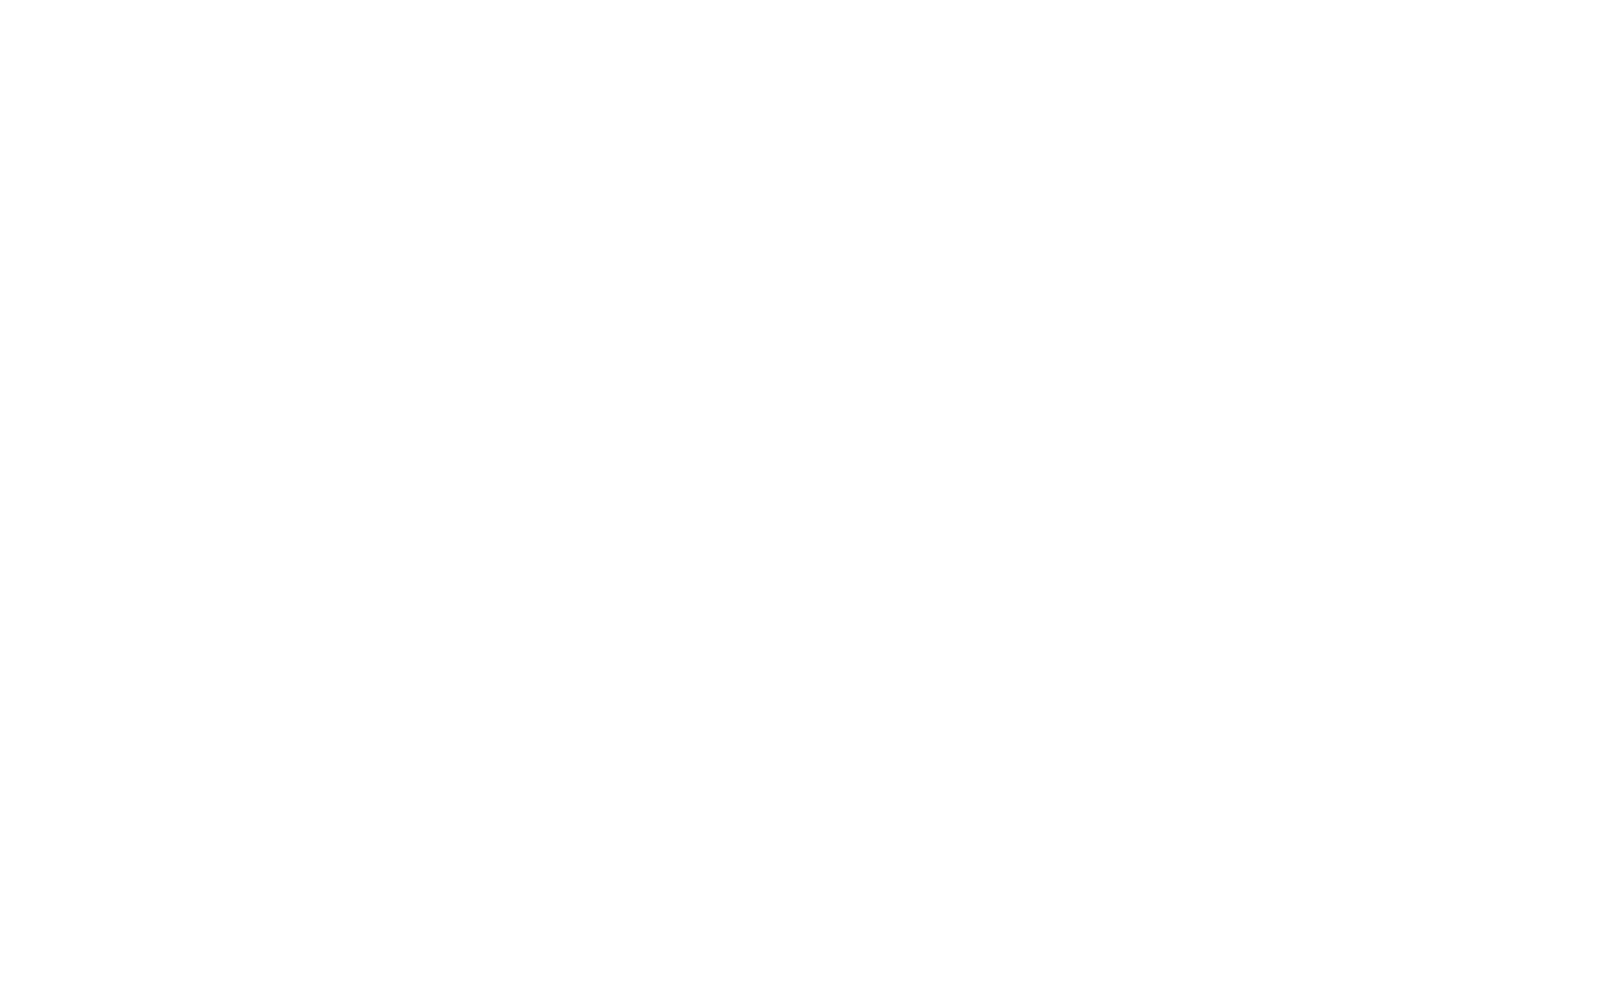

In [34]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')


# We have double the resonators

Makes sense that we might get more spikes: the resonators are interacting.  What about adding loss to polymer?

# Light Loss Polymer

In [35]:
n = 200
wls = np.linspace(1.5e-6, 1.585e-6, n+1)
betas2 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5 - .001j

In [36]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

     --------------------  1/201: wavelength: 1.5e-06  --------------------     

Scaled beta:  (62.843061753292396-2.7605048228521177e-05j) . Residual of determinant:  4.584695226855622e-10 


     --------------------  2/201: wavelength: 1.5004250000000001e-06  --------------------     

Scaled beta:  (62.82525088583829-2.7044987798011007e-05j) . Residual of determinant:  1.8385615933149885e-10 


     --------------------  3/201: wavelength: 1.50085e-06  --------------------     

Scaled beta:  (62.80745019240992-2.6719568269293526e-05j) . Residual of determinant:  1.9624033959196132e-11 


     --------------------  4/201: wavelength: 1.501275e-06  --------------------     

Scaled beta:  (62.78965961489635-2.6617698495196354e-05j) . Residual of determinant:  4.725659981979543e-10 


     --------------------  5/201: wavelength: 1.5017e-06  --------------------     

Scaled beta:  (62.77187909641972-2.6735613983894157e-05j) . Residual of determinant:  8.572132500980715e-10 


     

Scaled beta:  (62.103925215568914-3.871537740001963e-05j) . Residual of determinant:  1.3703214572025837e-11 


     --------------------  44/201: wavelength: 1.518275e-06  --------------------     

Scaled beta:  (62.08652859493328-3.5969184972381176e-05j) . Residual of determinant:  9.687176544311652e-11 


     --------------------  45/201: wavelength: 1.5187e-06  --------------------     

Scaled beta:  (62.06914218955236-3.3753663703838464e-05j) . Residual of determinant:  2.8706835655458146e-10 


     --------------------  46/201: wavelength: 1.519125e-06  --------------------     

Scaled beta:  (62.05176590637198-3.197582905531392e-05j) . Residual of determinant:  9.06164608611081e-11 


     --------------------  47/201: wavelength: 1.5195500000000001e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (62.034399662503894-3.056621014677955e-05j) . Residual of determinant:  1.6205982952398198e-11 


     --------------------  48/201: wavelength: 1.5

scaling guess: 1
scaling guess: 2
Scaled beta:  (61.416046392361274-0.00013255030361882168j) . Residual of determinant:  8.521770977148701e-11 


     --------------------  84/201: wavelength: 1.535275e-06  --------------------     

scaling guess: 1
Scaled beta:  (61.399024039763255-0.00010864489448069101j) . Residual of determinant:  1.0441527646546382e-11 


     --------------------  85/201: wavelength: 1.5357e-06  --------------------     

scaling guess: 1
Scaled beta:  (61.38201188944145-9.0765299157606e-05j) . Residual of determinant:  1.0936636665042933e-10 


     --------------------  86/201: wavelength: 1.536125e-06  --------------------     

scaling guess: 1
Scaled beta:  (61.3650103584107-7.719368979477286e-05j) . Residual of determinant:  1.4118839962831338e-10 


     --------------------  87/201: wavelength: 1.5365500000000001e-06  --------------------     

Scaled beta:  (61.34801951094064-6.67374808380193e-05j) . Residual of determinant:  7.276698357611343e-11 


  

Scaled beta:  (60.742698169064305-0.00028157760676357285j) . Residual of determinant:  7.1194459705044434e-12 


     --------------------  124/201: wavelength: 1.552275e-06  --------------------     

Scaled beta:  (60.72608403234071-0.0003565073644456625j) . Residual of determinant:  2.6758919624750486e-12 


     --------------------  125/201: wavelength: 1.5527e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.709516674192926-0.0004338474439819649j) . Residual of determinant:  6.9861010650188095e-12 


     --------------------  126/201: wavelength: 1.553125e-06  --------------------     

Scaled beta:  (60.69300130468642-0.0004849604062319548j) . Residual of determinant:  6.2391818343024024e-12 


     --------------------  127/201: wavelength: 1.5535500000000001e-06  --------------------     

Scaled beta:  (60.676513142389155-0.00048007207178268224j) . Residual of determinant:  8.73682359244402e-12 


     --------------------  128/201: wavelength: 1.553975e-06 

scaling guess: 1
scaling guess: 2
Scaled beta:  (60.08449428816809-4.397706330169228e-05j) . Residual of determinant:  1.7652344059399333e-10 


     --------------------  164/201: wavelength: 1.5692750000000001e-06  --------------------     

Scaled beta:  (60.068208127106125-4.8230092231705716e-05j) . Residual of determinant:  2.399804633321567e-10 


     --------------------  165/201: wavelength: 1.5697e-06  --------------------     

Scaled beta:  (60.05192998431778-5.3468456051041586e-05j) . Residual of determinant:  1.9026113476734321e-10 


     --------------------  166/201: wavelength: 1.570125e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (60.035659728316396-5.997053706830208e-05j) . Residual of determinant:  6.980284520769462e-11 


     --------------------  167/201: wavelength: 1.5705500000000002e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.019397223018835-6.811887088970497e-05j) . Residual of determinant:  3.1428377

<IPython.core.display.Javascript object>


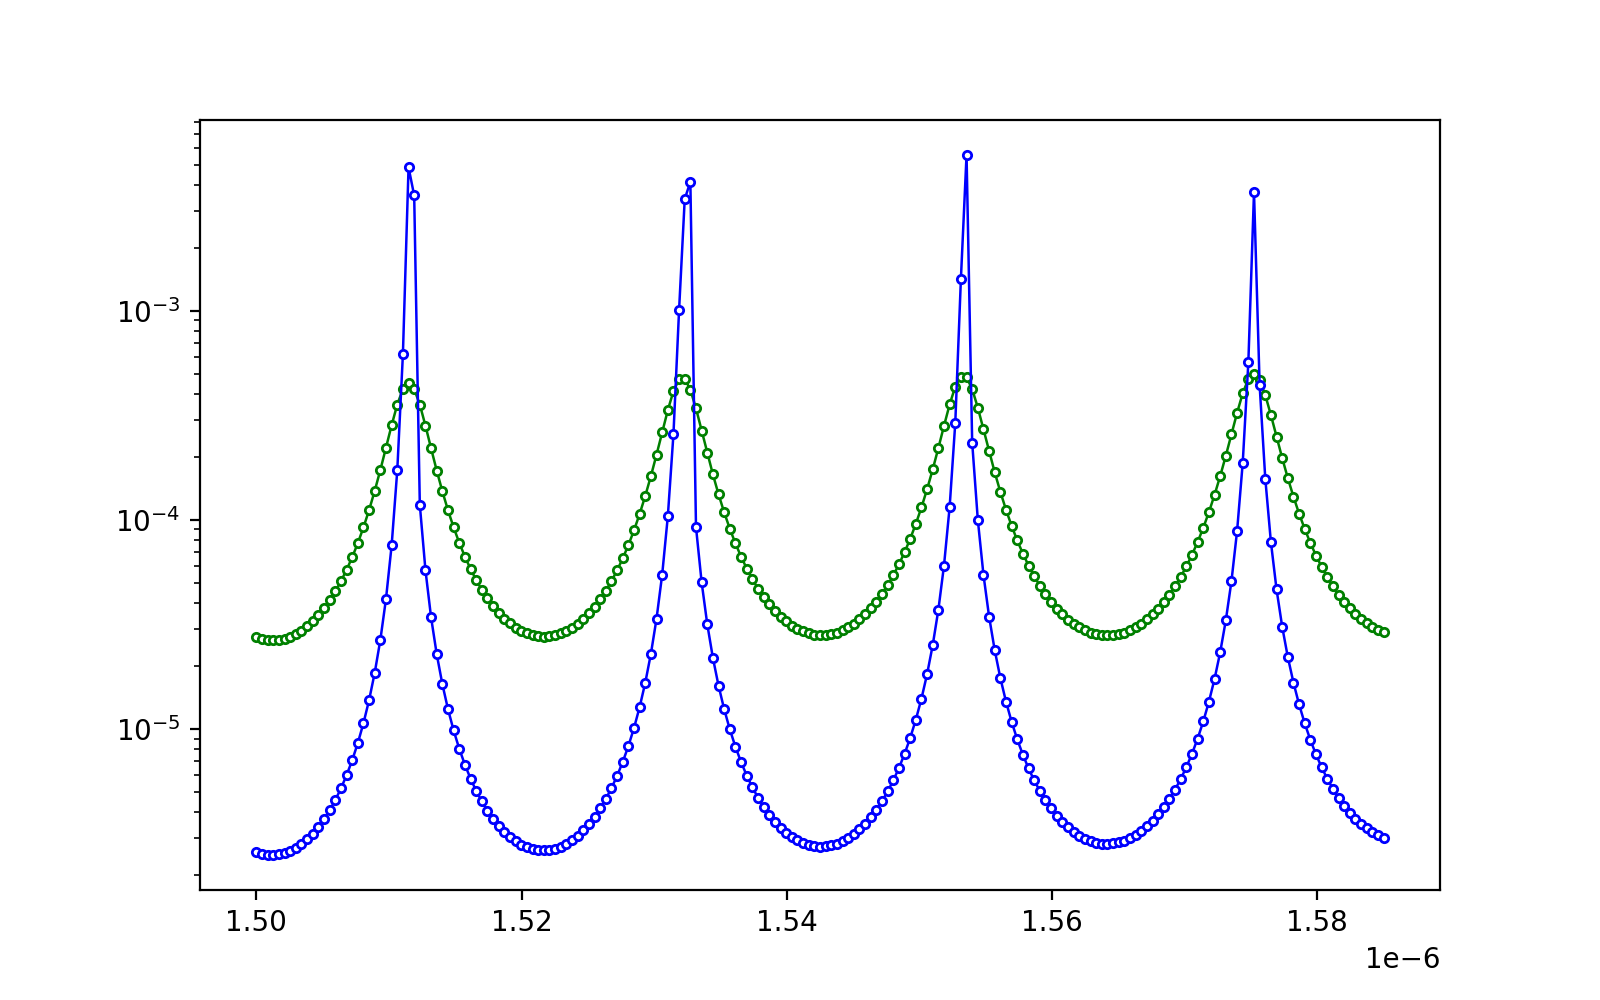

In [40]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas2.imag, color='green', linewidth=.9, marker='o', 
        markersize=3, markerfacecolor='white')
plt.plot(wls, -betas1.imag, color='blue', linewidth=.9, marker='o', 
        markersize=3, markerfacecolor='white')

plt.yscale('log')

In [41]:
ls

driver.py  k_001_scaled_betas.npy  Mesh_Check.ipynb  outputs/
graph.py   medium.sh*              modes/            Wavelength_Study.ipynb


In [42]:
np.save('k_001_subint_150_1585_201_scaled_betas', betas2)

In [43]:
ls

driver.py                                   Mesh_Check.ipynb
graph.py                                    modes/
k_001_scaled_betas.npy                      outputs/
k_001_subint_150_1585_201_scaled_betas.npy  Wavelength_Study.ipynb
medium.sh*


# Medium Loss polymer

In [ ]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas3 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5 - .005j

In [ ]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas3[i] = beta
    

In [ ]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas2.imag, color='green', linewidth=.9)
plt.plot(wls, -betas1.imag, color='blue', linewidth=.9)
plt.plot(wls, -betas3.imag, color='red', linewidth=.9)

plt.yscale('log')

# High Loss Polymer

In [ ]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas4 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5 - .01j

In [ ]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas4[i] = beta
    

In [ ]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas2.imag, color='green', linewidth=.9)
plt.plot(wls, -betas1.imag, color='blue', linewidth=.9)
plt.plot(wls, -betas3.imag, color='red', linewidth=.9)
plt.plot(wls, -betas4.imag, color='orange', linewidth=.9)

plt.yscale('log')

In [ ]:
np.save('no_loss_betas', -betas1.imag)
np.save('low_loss_betas', -betas2.imag)
np.save('med_loss_betas', -betas3.imag)
np.save('high_loss_betas', -betas4.imag)

# Comparison Graph

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)

B1 = np.load('data/no_loss_betas.npy')
B2 = np.load('data/low_loss_betas.npy')
B3 = np.load('data/med_loss_betas.npy')
B4 = np.load('data/high_loss_betas.npy')

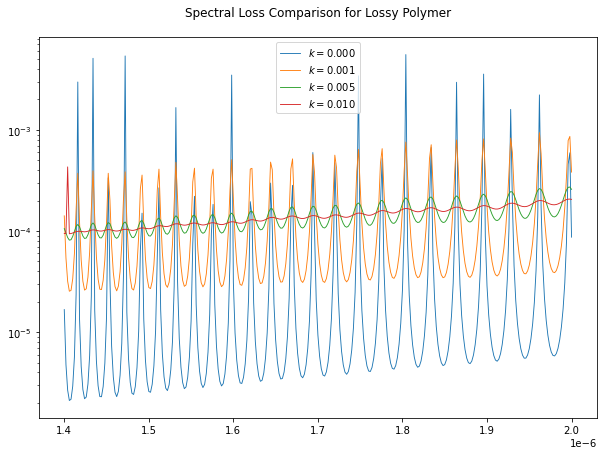

In [13]:
plt.figure(figsize=(10,7))
plt.plot(wls, B1, label='$k = 0.000$', linewidth=.9)
plt.plot(wls, B2, label='$k=0.001$', linewidth=.9)
plt.plot(wls, B3, label='$k=0.005$', linewidth=.9)
plt.plot(wls, B4, label='$k=0.010$', linewidth=.9)
plt.legend()
plt.title("Spectral Loss Comparison for Lossy Polymer\n")
plt.yscale('log')

In [22]:
b1 = 20 / np.log(10) * np.load('data/no_loss_betas.npy')/A.scale
b2 = 20 / np.log(10) * np.load('data/low_loss_betas.npy')/A.scale
b3 = 20 / np.log(10) * np.load('data/med_loss_betas.npy')/A.scale
b4 = 20 / np.log(10) * np.load('data/high_loss_betas.npy')/A.scale

In [31]:
n0 = np.load('data/N0_betas.npy')

N0 = 20/np.log(10)*n0/A.scale

In [8]:
plt.figure(figsize=(10,7))
plt.plot(wls, N0, label='N0', linewidth=1)
plt.plot(wls, b1, label='no loss', linewidth=.9)
plt.plot(wls, b2, label='low loss', linewidth=.9)
plt.plot(wls, b3, label='medium loss', linewidth=.9)
plt.plot(wls, b4, label='high loss', linewidth=.9)
plt.legend()
plt.title("Spectral Loss Comparison for Lossy Polymer\n")
plt.yscale('log')

NameError: name 'N0' is not defined

<Figure size 720x504 with 0 Axes>

In [35]:
np.save('data/no_loss_CL', b1)
np.save('data/low_loss_CL', b2)
np.save('data/med_loss_CL', b3)
np.save('data/high_loss_CL', b4)
np.save('data/N0_CL', N0)
